# Bioiversity in National Parks Project

## Scope:
- We want to look at data for the wildlife that is found in the US national parks.
- What is the proportion of different species in each park?
- What are the proportions of different classes are in each park (mammals, birds, etc.)?
- What populations are endangered (or otherwise have conservation status)? How many are there?
- Which parks have the most unique species?
- Which parks have the highest populations?

In [1]:
#Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load in data
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

1\) Descriptive Analysis

In [3]:
print(observations.columns.to_list())
print(species.columns.to_list())

['scientific_name', 'park_name', 'observations']
['category', 'scientific_name', 'common_names', 'conservation_status']


In [4]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Yellowstone National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


- There are no empty values in observations
- The data types are as expected, an integer for observations and objects for the nominal variables.
- Mean of 142.28, median of 124, std of 68.9, IQR of 109. Distribution of observations may be slightly skewed.

In [6]:
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Holcus lanatus,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


- All data types are as expected, as each variable is a nominal category.
- No missing data inside the first 3 columns, but many in conservation_status
- Scientific name repeated up to 3 times - potential duplicates?

In [8]:
duplicates = species.duplicated()
print(duplicates.value_counts())

False    5824
dtype: int64


No duplicates?

In [9]:
print(species.scientific_name[species.scientific_name.duplicated()].value_counts())

Columba livia          2
Procyon lotor          2
Myotis lucifugus       2
Holcus lanatus         2
Puma concolor          2
                      ..
Sorex palustris        1
Zizia aptera           1
Apocynum cannabinum    1
Trifolium repens       1
Carex leptalea         1
Name: scientific_name, Length: 274, dtype: int64


In [10]:
print(species[species.scientific_name=="Procyon lotor"])

     category scientific_name                               common_names  \
26     Mammal   Procyon lotor                    Common Raccoon, Raccoon   
3030   Mammal   Procyon lotor  Common Raccoon, Northern Raccoon, Raccoon   
4459   Mammal   Procyon lotor                                    Raccoon   

     conservation_status  
26                   NaN  
3030                 NaN  
4459                 NaN  


In [11]:
print(species[species.scientific_name=="Castor canadensis"])

     category    scientific_name             common_names conservation_status
49     Mammal  Castor canadensis  American Beaver, Beaver                 NaN
3050   Mammal  Castor canadensis          American Beaver                 NaN
4475   Mammal  Castor canadensis                   Beaver                 NaN


Duplicates are presumably from different regions having different names for their animals. In order to prevent duplicates, when merging, we will drop duplicates of the scientific names.

In [12]:
print(species.conservation_status.value_counts())

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


- Doesn't follow the IUCN list for conservation, or the NatureServe conservation system, so there is no direct comparison.
- Hypothesis - it may be for species of no concern

In [13]:
species_observation = pd.merge(observations, species.drop_duplicates(subset="scientific_name"), on = 'scientific_name')

In [14]:
species_observation.describe(include='all')

,scientific_name,park_name,observations,category,common_names,conservation_status
count,23296,23296,23296.000000,23296,23296,760
unique,5541,4,NaN,7,5229,4
top,Myotis lucifugus,Yellowstone National Park,NaN,Vascular Plant,Dicranum Moss,Species of Concern
freq,12,5824,NaN,17880,28,644
mean,NaN,NaN,142.287904,NaN,NaN,NaN
std,NaN,NaN,69.890532,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN
25%,NaN,NaN,86.000000,NaN,NaN,NaN
50%,NaN,NaN,124.000000,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,NaN,NaN


In [15]:
species_observation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23296 non-null  object
 1   park_name            23296 non-null  object
 2   observations         23296 non-null  int64 
 3   category             23296 non-null  object
 4   common_names         23296 non-null  object
 5   conservation_status  760 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [16]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [17]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [18]:
print(species_observation.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  


In [19]:
species_observation.fillna("Missing Values", inplace  = True)

In [20]:
print(species_observation.observations[species_observation.conservation_status == "Species of Concern"].mean())
print(species_observation.observations[species_observation.conservation_status == "Endangered"].mean())
print(species_observation.observations[species_observation.conservation_status == "Threatened"].mean())
print(species_observation.observations[species_observation.conservation_status == "In Recovery"].mean())
print(species_observation.observations[species_observation.conservation_status == "Missing Values"].mean())

128.22826086956522
41.14705882352941
70.16666666666667
116.0
143.1240681576145


In [21]:
species_observation

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Missing Values
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Missing Values
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Missing Values
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Missing Values
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Missing Values
...,...,...,...,...,...,...
23291,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,Missing Values
23292,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",Missing Values
23293,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",Missing Values
23294,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",Missing Values


In [22]:
sortedindex = species_observation.groupby(["conservation_status"]).mean().reset_index()
order_mean =(sortedindex.sort_values(by="observations", ascending=False))
print(order_mean)

  conservation_status  observations
2      Missing Values    143.124068
3  Species of Concern    128.228261
1         In Recovery    116.000000
4          Threatened     70.166667
0          Endangered     41.147059


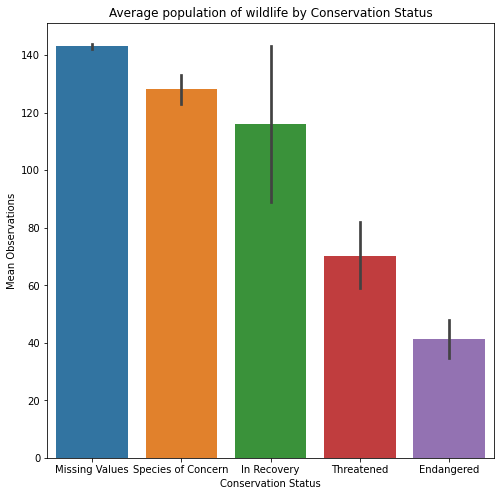

In [23]:
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(data = species_observation, x = "conservation_status", y = "observations", order = order_mean.conservation_status)
ax.set(ylabel = "Mean Observations", xlabel = "Conservation Status")
ax.set_title("Average population of wildlife by Conservation Status")
plt.show()

In [24]:
print(species_observation.observations[species_observation.conservation_status == "Species of Concern"].sum())
print(species_observation.observations[species_observation.conservation_status == "Endangered"].sum())
print(species_observation.observations[species_observation.conservation_status == "Threatened"].sum())
print(species_observation.observations[species_observation.conservation_status == "In Recovery"].sum())
print(species_observation.observations[species_observation.conservation_status == "Missing Values"].sum())

82579
2798
2526
1392
3225444


In [25]:
Concern = (species_observation.observations[species_observation.conservation_status == "Species of Concern"].sum())
Endangered = (species_observation.observations[species_observation.conservation_status == "Endangered"].sum())
Threatened = (species_observation.observations[species_observation.conservation_status == "Threatened"].sum())
Recovering = (species_observation.observations[species_observation.conservation_status == "In Recovery"].sum())
Missing = (species_observation.observations[species_observation.conservation_status == "Missing Values"].sum())
numbers = [Concern, Endangered, Threatened, Recovering, Missing]

In [26]:
print(numbers)

[82579, 2798, 2526, 1392, 3225444]


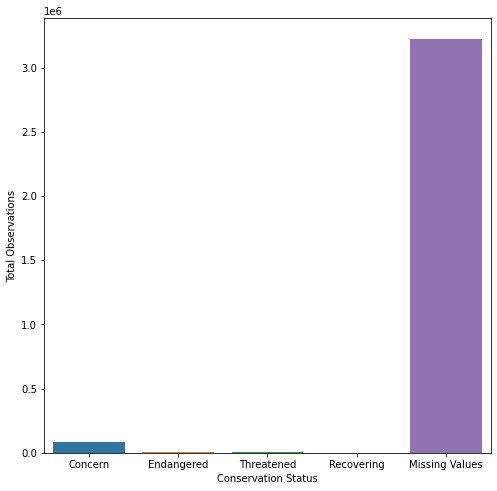

In [60]:
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(x = [0,1,2,3,4], y = numbers)
ax.set(ylabel = "Total Observations", xlabel = "Conservation Status")
ax.set_xticklabels(["Concern", "Endangered", "Threatened", "Recovering", "Missing Values"])
plt.show()

The missing data has both a higher average number of counts, and a much higher total number of counts. This suggests that, as hypothesized, the missing data represents the animals with the least concern over conservation

In [28]:
species_observation = species_observation.replace("Missing Values", "Least Concern")

In [29]:
print(species_observation.conservation_status)

0        Least Concern
1        Least Concern
2        Least Concern
3        Least Concern
4        Least Concern
             ...      
23291    Least Concern
23292    Least Concern
23293    Least Concern
23294    Least Concern
23295    Least Concern
Name: conservation_status, Length: 23296, dtype: object


In [30]:
print(species_observation.columns)

Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')


In [31]:
print(species_observation.park_name.value_counts())

Yellowstone National Park              5824
Yosemite National Park                 5824
Great Smoky Mountains National Park    5824
Bryce National Park                    5824
Name: park_name, dtype: int64


In [32]:
park_class = species_observation.groupby(["park_name", "category"]).sum().reset_index()
parkdist = pd.pivot_table(park_class, index = "category", values="observations", columns = "park_name")
parkdist.describe().apply(lambda x: x.round(2))

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
count,7.00,7.00,7.00,7.00
mean,82289.29,61688.57,206223.14,123333.14
std,159881.23,120471.03,401719.45,240200.11
min,7380.00,5691.00,19440.00,11444.00
25%,10186.50,7456.50,25064.00,15049.00
50%,20550.00,15012.00,50795.00,30339.00
75%,42319.50,31292.50,105136.00,62995.00
max,443083.00,333619.00,1112927.00,665461.00


In [33]:
classdist = pd.pivot_table(park_class, index = "park_name", values="observations", columns="category")
classdist.describe().apply(lambda x: x.round(2))

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,10992.75,73208.25,17704.50,29174.00,47663.25,11169.50,638772.50
std,6125.11,39384.21,9426.41,15745.48,25755.48,6076.66,344938.55
min,5707.00,37728.00,9206.00,15012.00,24857.00,5691.00,333619.00
25%,6961.75,48167.25,11618.75,19165.50,30958.25,7385.25,415717.00
50%,9412.00,63927.00,15519.00,25444.50,41387.50,9716.50,554272.00
75%,13443.00,88968.00,21604.75,35453.00,58092.50,13500.75,777327.50
max,19440.00,127251.00,30574.00,50795.00,83021.00,19554.00,1112927.00


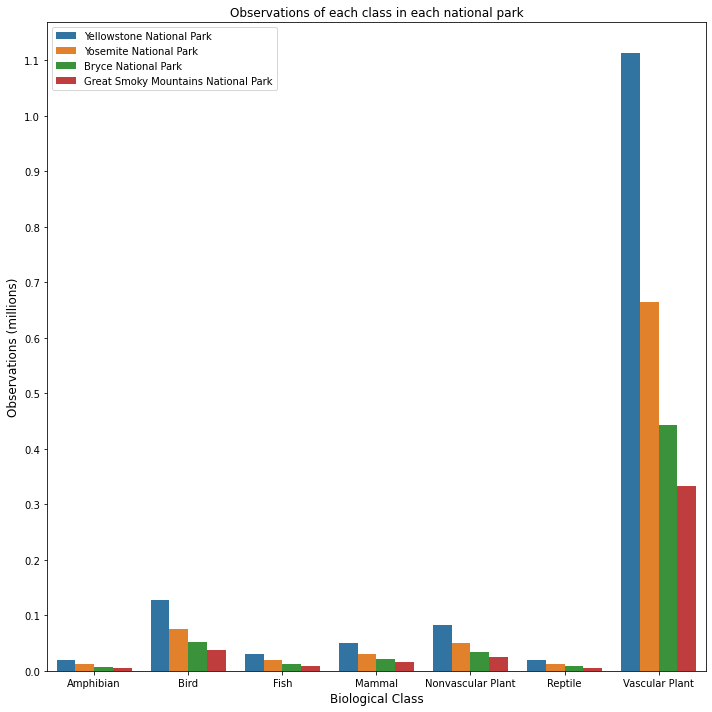

In [34]:
fig, ax = plt.subplots(figsize = (10,10))
order=park_class.groupby("park_name").sum().sort_values(ascending=False, by="observations").index
sns.barplot(x = park_class.category, y = park_class.observations, hue = park_class.park_name, hue_order = order)
ax.set_xlabel("Biological Class", fontsize = "large")
ax.set_ylabel("Observations (millions)", fontsize = "large")
ytickrange = range(0, 12*10**5, 1*10**5)
ax.set_yticks(ytickrange)
ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])
plt.title("Observations of each class in each national park", fontsize = "large")
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
#Checking that the processing has conserved the total number of observations
print("Total observations = {}".format(observations.observations.sum()))
print(park_class.observations.sum())

Total observations = 3314739
3314739


So we can see that Yellowstone has the most of each Biological Class, followed by Yosemite, Bryce, and Great Smoky Mountains National Parks respectively. Vascular plants completely dominate the other biological classes in terms of observations.

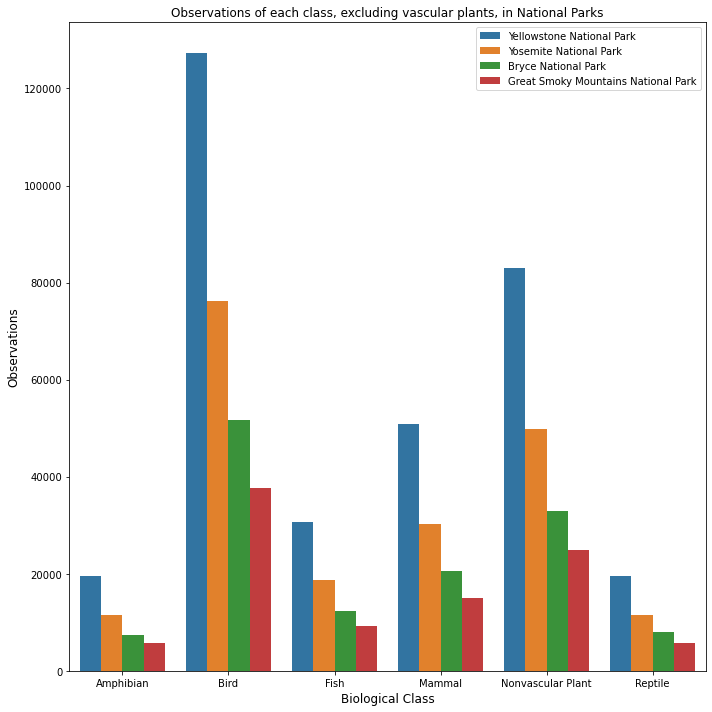

In [36]:
no_vasplant = species_observation[species_observation.category!="Vascular Plant"].groupby(["park_name", "category"]).sum().reset_index()
fig, ax = plt.subplots(figsize = (10,10))
order=no_vasplant.groupby("park_name").sum().sort_values(ascending=False, by="observations").index
sns.barplot(x = no_vasplant.category, y = no_vasplant.observations, hue = no_vasplant.park_name, hue_order = order)
ax.set_xlabel("Biological Class", fontsize = "large")
ax.set_ylabel("Observations", fontsize = "large")
ytickrange = range(0, 2*10**5, 1*10**4)
#ax.set_yticks(ytickrange)
#ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])
plt.title("Observations of each class, excluding vascular plants, in National Parks", fontsize = "large")
plt.legend()
plt.tight_layout()
plt.show()

After Vascular Plant, Bird, Nonvascular Plant, Mammal, Fish, and Reptile/Amphibian are the respective most common classes.

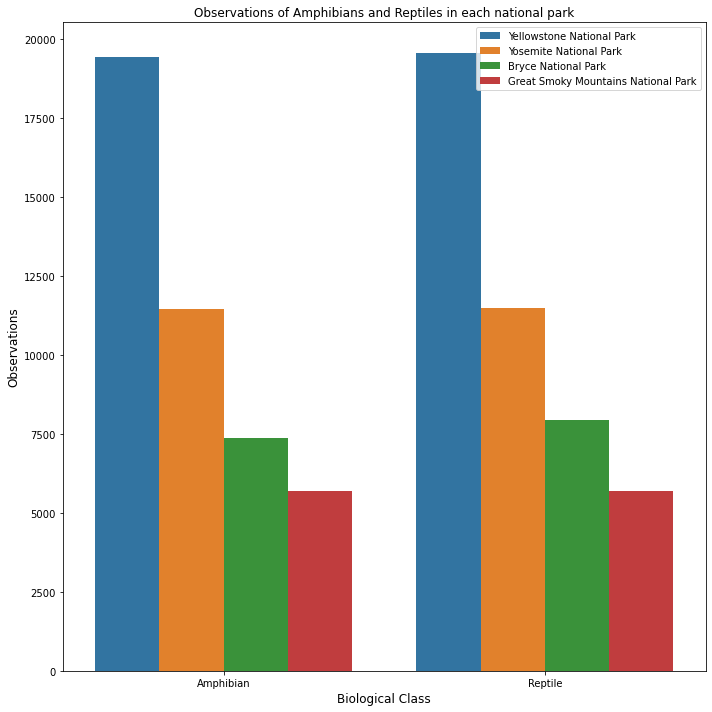

In [37]:
fig, ax = plt.subplots(figsize = (10,10))
data = park_class[park_class.category.isin(["Amphibian", "Reptile"])]
order=data.groupby("park_name").sum().sort_values(ascending=False, by="observations").index
sns.barplot(x = data.category, y = data.observations, hue = data.park_name, hue_order = order)
ax.set_xlabel("Biological Class", fontsize = "large")
ax.set_ylabel("Observations", fontsize = "large")
ytickrange = range(0, 12*10**5, 1*10**5)
#ax.set_yticks(ytickrange)
#ax.set_yticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])
plt.title("Observations of Amphibians and Reptiles in each national park", fontsize = "large")
plt.legend()
plt.tight_layout()
plt.show()

The number of amphibians and reptiles are virtually the same!

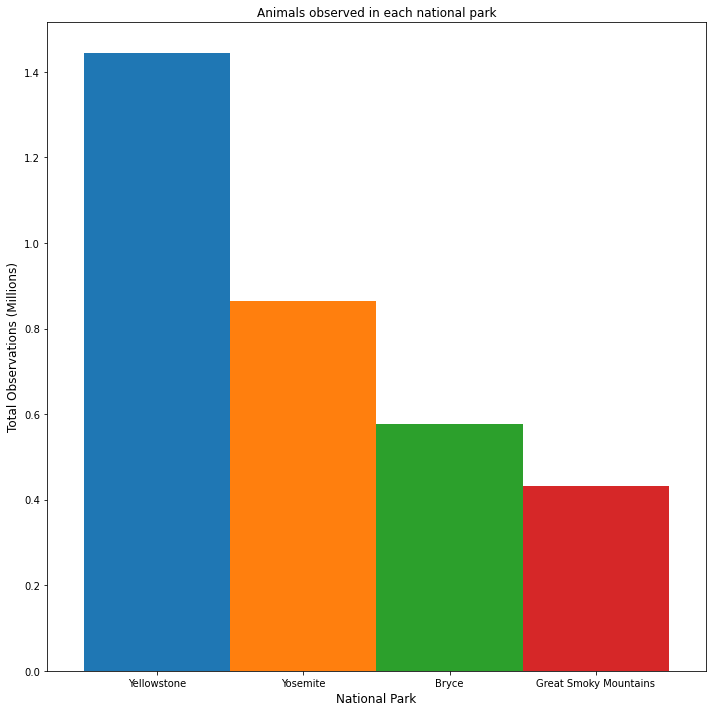

In [38]:
parkdist.sum().sort_values(ascending=False).plot.bar(figsize = (10,10), color = sns.color_palette(n_colors=4), width = 1, rot = 0)
ticks, labels = plt.xticks()
plt.xticks(labels = ["Yellowstone", "Yosemite", "Bryce", "Great Smoky Mountains"], ticks = ticks)
plt.yticks(ticks = range(0,15*10**5, 2*10**5), labels = [tick/10**6 for tick in range(0,15*10**5, 2*10**5)])
plt.xlabel("National Park", fontsize = "large")
plt.ylabel("Total Observations (Millions)", fontsize = "large")
plt.title("Animals observed in each national park")
plt.tight_layout()
plt.show()

In [39]:
park_class.columns

Index(['park_name', 'category', 'observations'], dtype='object')

In [40]:
yellowunique = observations.scientific_name[observations.park_name == "Yellowstone National Park"].nunique()
yoseunique = observations.scientific_name[observations.park_name == "Yosemite National Park"].nunique()
bryceunique = observations.scientific_name[observations.park_name == "Bryce National Park"].nunique()
gsmunique = observations.scientific_name[observations.park_name == "Great Smoky Mountains National Park"].nunique()

In [41]:
print(yellowunique)
print(yoseunique)
print(bryceunique)
print(gsmunique)

5541
5541
5541
5541


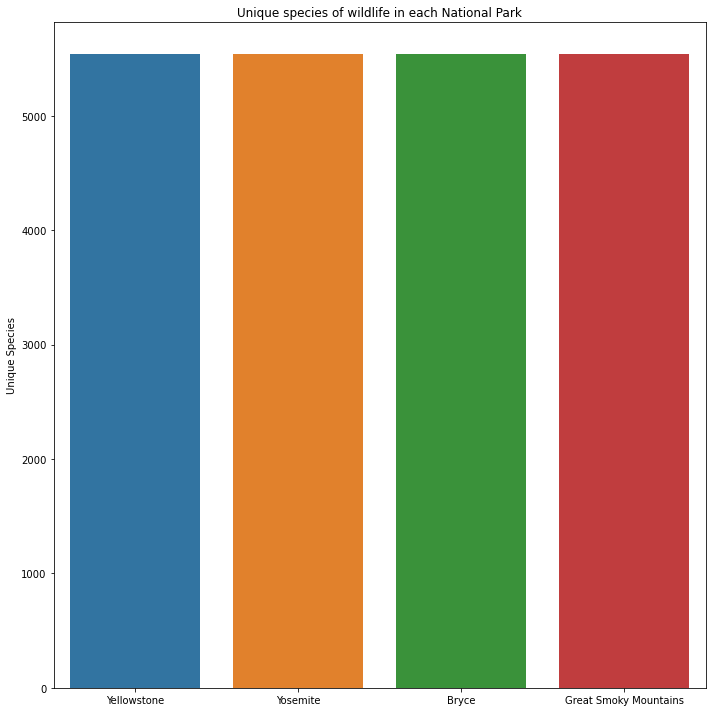

In [42]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(y = [yellowunique, yoseunique, bryceunique, gsmunique], x = [0,1,2,3])
ax.set_xticklabels(["Yellowstone", "Yosemite", "Bryce", "Great Smoky Mountains"])
ax.set_ylabel("Unique Species")
plt.title("Unique species of wildlife in each National Park")
plt.tight_layout()
plt.show()

So each species can be found in each national park!

In [43]:
species_observation.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least Concern


In [44]:
print(species_observation.conservation_status.unique())

['Least Concern' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


In [45]:
park_cons = species_observation.groupby(["park_name", "conservation_status"]).sum(numeric_only=True).reset_index()

In [46]:
park_cons

,park_name,conservation_status,observations
0,Bryce National Park,Endangered,489
1,Bryce National Park,In Recovery,258
2,Bryce National Park,Least Concern,559926
3,Bryce National Park,Species of Concern,14925
4,Bryce National Park,Threatened,427
5,Great Smoky Mountains National Park,Endangered,334
6,Great Smoky Mountains National Park,In Recovery,189
7,Great Smoky Mountains National Park,Least Concern,420643
8,Great Smoky Mountains National Park,Species of Concern,10314
9,Great Smoky Mountains National Park,Threatened,340


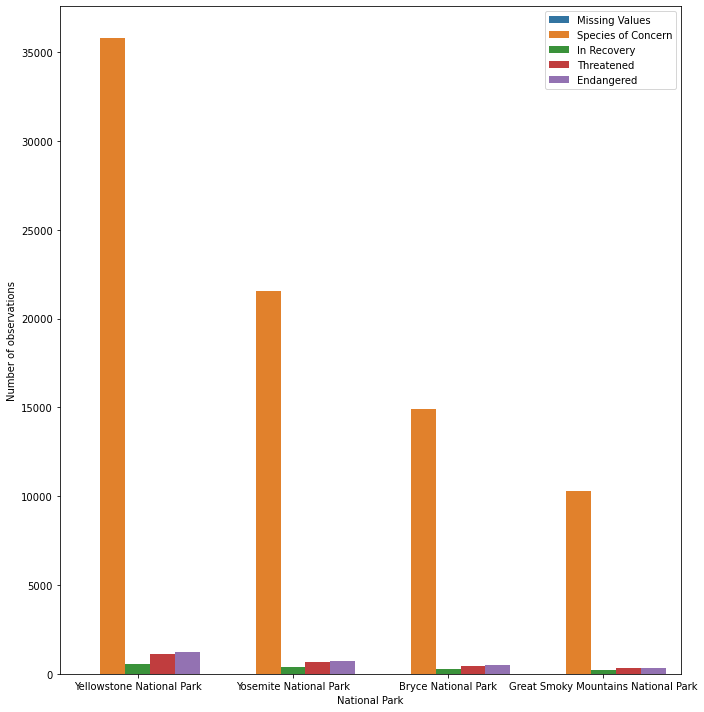

In [47]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = park_cons.park_name, y = park_cons.observations, hue=park_cons.conservation_status, order = order, hue_order=order_mean.conservation_status)
ax.set_xlabel("National Park")
ax.set_ylabel("Number of observations")
plt.legend()
plt.tight_layout()
plt.show()

With the "least" concern dominating so much, lets remove that and look at the rest....

In [48]:
park_cons_nolc = park_cons[park_cons.conservation_status!="Least Concern"]

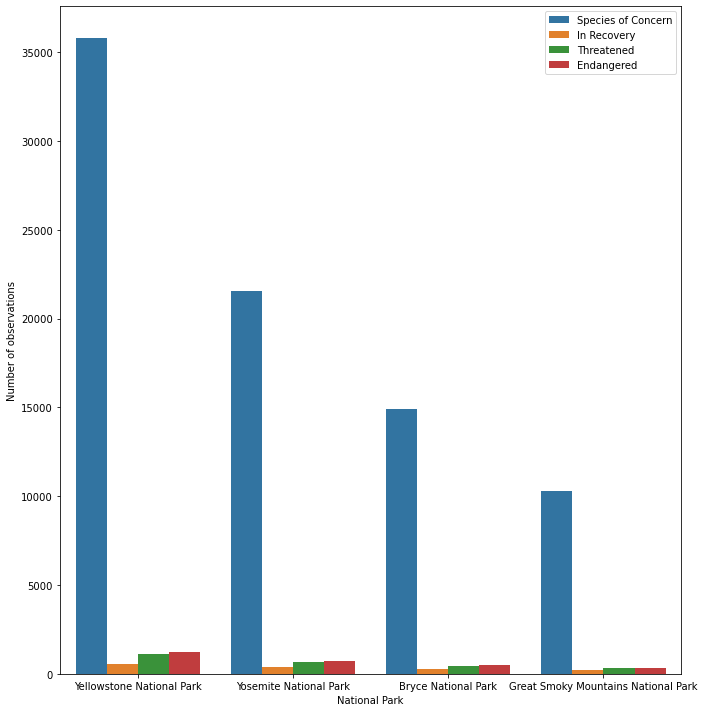

In [49]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = park_cons_nolc.park_name, y = park_cons_nolc.observations, hue=park_cons_nolc.conservation_status, order = order, hue_order=order_mean.conservation_status.iloc[1:])
ax.set_xlabel("National Park")
ax.set_ylabel("Number of observations")
plt.legend()
plt.tight_layout()
plt.show()

Species of concern, again, is extremely dominant over the remaining, and is clearly higher than the rest for each park. So, looking without:

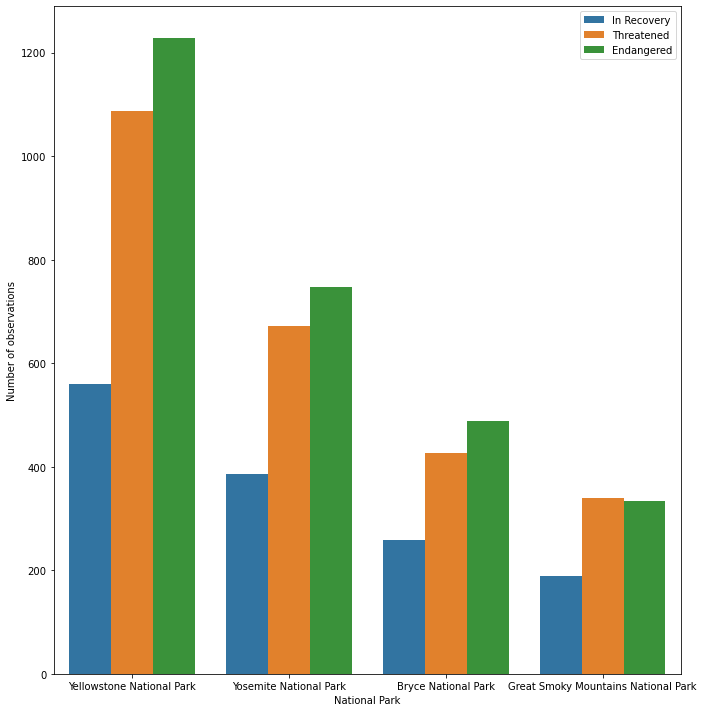

In [50]:
park_cons_nolcsc = park_cons_nolc[park_cons_nolc.conservation_status!="Species of Concern"]
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = park_cons_nolcsc.park_name, y = park_cons_nolcsc.observations, hue=park_cons_nolcsc.conservation_status, order = order, hue_order = order_mean.conservation_status.iloc[2:])
ax.set_xlabel("National Park")
ax.set_ylabel("Number of observations")
plt.legend()
plt.tight_layout()
plt.show()

Following Least Concern and Species of Concern, Endangered is generally the next highest, except in the Great Smoky Mountains National Park, where it appears to be the Threatened classification. The number of species classed as In Recovery is the smallest for each national park

In [51]:
total_obs = park_cons.groupby("park_name").sum().reset_index()
park_cons_pc = pd.merge(park_cons, total_obs, on="park_name")
park_cons_pc.rename(columns={"observations_x":"observations", "observations_y": "total_observations"}, inplace=True)
park_cons_pc["perc_obs"] = park_cons_pc.observations / park_cons_pc.total_observations * 100
park_cons_pc

,park_name,conservation_status,observations,total_observations,perc_obs
0,Bryce National Park,Endangered,489,576025,0.084892
1,Bryce National Park,In Recovery,258,576025,0.044790
2,Bryce National Park,Least Concern,559926,576025,97.205156
3,Bryce National Park,Species of Concern,14925,576025,2.591033
4,Bryce National Park,Threatened,427,576025,0.074129
5,Great Smoky Mountains National Park,Endangered,334,431820,0.077347
6,Great Smoky Mountains National Park,In Recovery,189,431820,0.043768
7,Great Smoky Mountains National Park,Least Concern,420643,431820,97.411653
8,Great Smoky Mountains National Park,Species of Concern,10314,431820,2.388495
9,Great Smoky Mountains National Park,Threatened,340,431820,0.078737


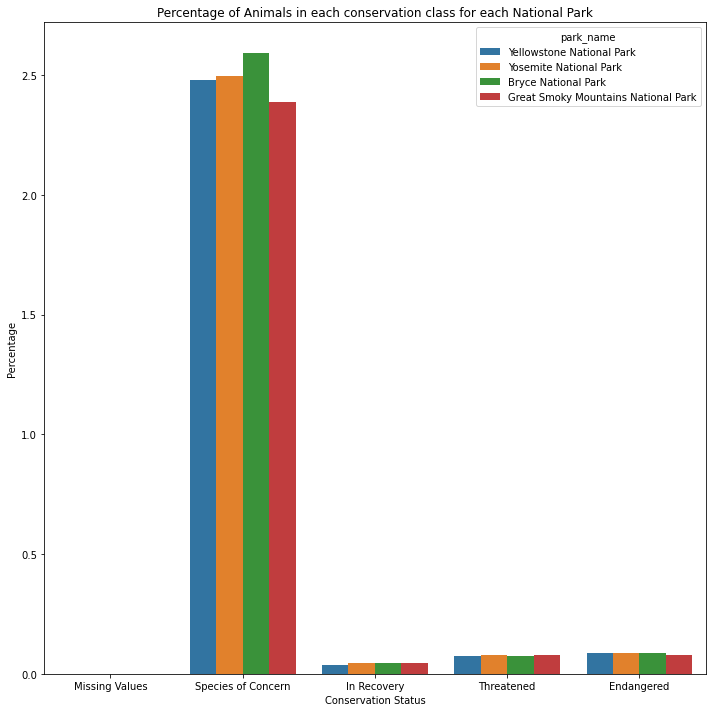

In [52]:
fig, ax = plt.subplots(figsize= (10,10))
sns.barplot(x = park_cons_pc.conservation_status, y = park_cons_pc.perc_obs, hue = park_cons_pc.park_name, hue_order=order, order = order_mean.conservation_status)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Percentage")
plt.title("Percentage of Animals in each conservation class for each National Park")
plt.tight_layout()
plt.show()

We see, again, as a percentage, that least concern and species of concern dominate. Looking at the final three:

<ipython-input-53-28989ea57ffe>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  park_cons_pc_red = park_cons_pc_red[park_cons_pc.conservation_status!="Species of Concern"]


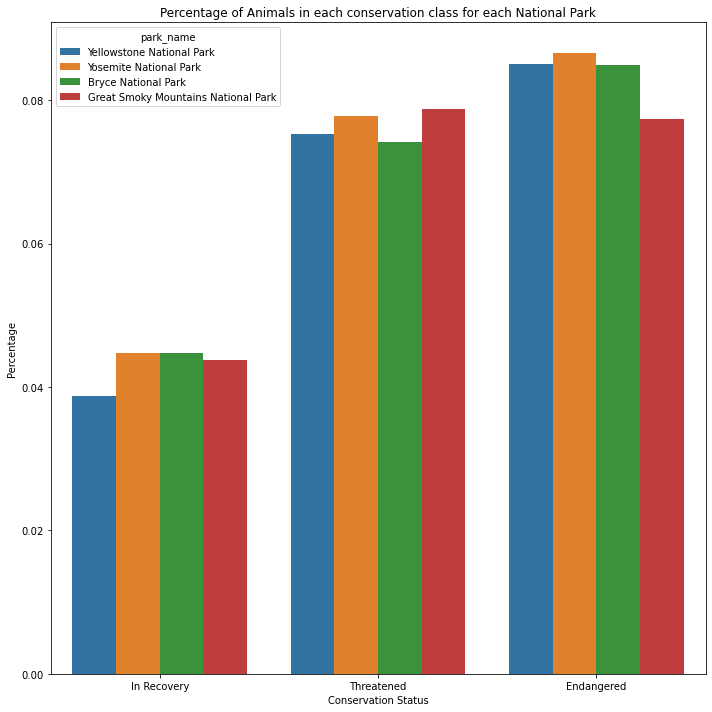

In [53]:
fig, ax = plt.subplots(figsize= (10,10))
park_cons_pc_red = park_cons_pc[park_cons_pc.conservation_status!="Least Concern"]
park_cons_pc_red = park_cons_pc_red[park_cons_pc.conservation_status!="Species of Concern"]
sns.barplot(x = park_cons_pc_red.conservation_status, y = park_cons_pc_red.perc_obs, hue = park_cons_pc_red.park_name, hue_order=order, order = order_mean.conservation_status.iloc[2:])
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Percentage")
plt.title("Percentage of Animals in each conservation class for each National Park")
plt.tight_layout()
plt.show()

<ipython-input-54-5472e70917b9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  park_cons_pc_red = park_cons_pc_red[park_cons_pc.conservation_status!="Species of Concern"]


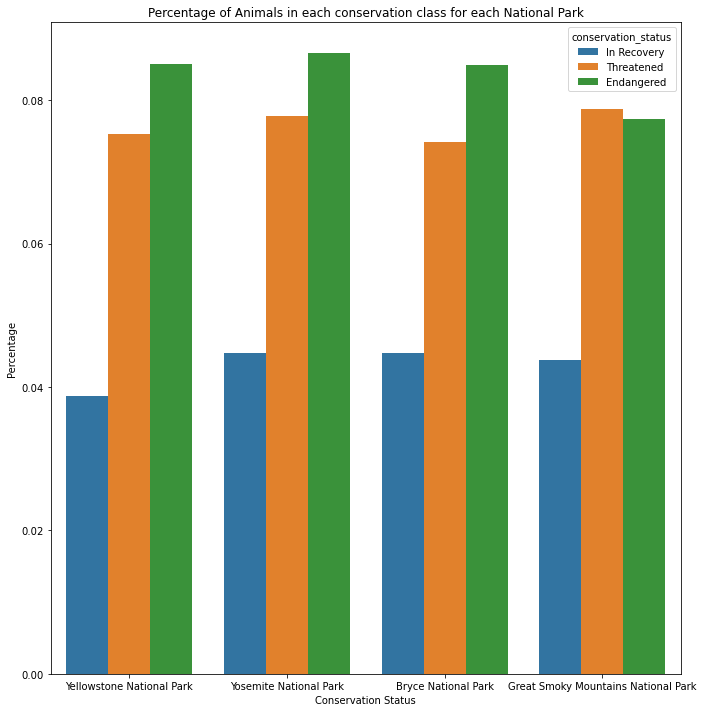

In [54]:
fig, ax = plt.subplots(figsize= (10,10))
park_cons_pc_red = park_cons_pc[park_cons_pc.conservation_status!="Least Concern"]
park_cons_pc_red = park_cons_pc_red[park_cons_pc.conservation_status!="Species of Concern"]
sns.barplot(x = park_cons_pc_red.park_name, y = park_cons_pc_red.perc_obs, hue = park_cons_pc_red.conservation_status, order= order, hue_order= order_mean.conservation_status.iloc[2:])
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Percentage")
plt.title("Percentage of Animals in each conservation class for each National Park")
plt.tight_layout()
plt.show()

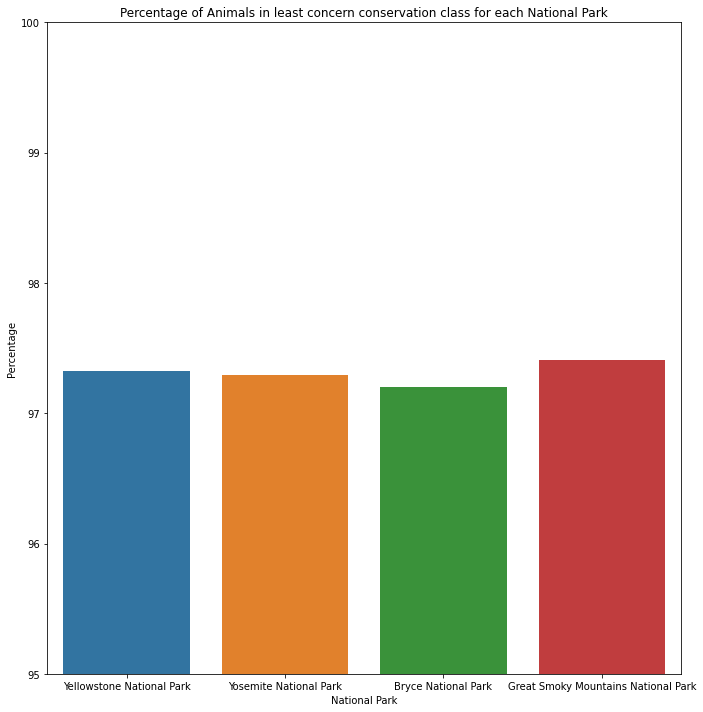

In [55]:
fig, ax = plt.subplots(figsize= (10,10))
park_cons_pc_lc = park_cons_pc[park_cons_pc.conservation_status=="Least Concern"]
#park_cons_pc_red = park_cons_pc_red[park_cons_pc.conservation_status!="Species of Concern"]
sns.barplot(x = park_cons_pc_lc.park_name, y = park_cons_pc_lc.perc_obs, order= order)
ax.set_xlabel("National Park")
ax.set_ylabel("Percentage")
ax.set_ylim(95,100)
plt.title("Percentage of Animals in least concern conservation class for each National Park")
plt.tight_layout()
plt.show()

So the distributions are about the same:
- The national parks all have similar percentages of Least Concern, Species of Concern, Endangered, In Rcovery, and Threatened Species
- Yellowstone has a lower percentage of species in recovery
- The Great Smoky Mountains National Park has the highest percentage of animals in the Least Concern class

In [56]:
category_cons = species_observation.groupby(["category", "conservation_status"]).sum().reset_index()
category_cons

,category,conservation_status,observations
0,Amphibian,Endangered,144
1,Amphibian,Least Concern,41219
2,Amphibian,Species of Concern,2044
3,Amphibian,Threatened,564
4,Bird,Endangered,574
5,Bird,In Recovery,1392
6,Bird,Least Concern,254225
7,Bird,Species of Concern,36642
8,Fish,Endangered,455
9,Fish,Least Concern,67422


In [57]:
total_cats = category_cons.groupby("category").sum().reset_index()
classes = pd.merge(category_cons, total_cats, on="category")
classes.rename(columns={"observations_x":"observations", "observations_y": "total_observations"}, inplace=True)
classes["perc_obs"] = classes.observations / classes.total_observations * 100
classes

,category,conservation_status,observations,total_observations,perc_obs
0,Amphibian,Endangered,144,43971,0.327489
1,Amphibian,Least Concern,41219,43971,93.741330
2,Amphibian,Species of Concern,2044,43971,4.648518
3,Amphibian,Threatened,564,43971,1.282664
4,Bird,Endangered,574,292833,0.196016
5,Bird,In Recovery,1392,292833,0.475356
6,Bird,Least Concern,254225,292833,86.815694
7,Bird,Species of Concern,36642,292833,12.512934
8,Fish,Endangered,455,70818,0.642492
9,Fish,Least Concern,67422,70818,95.204609


In [58]:
end_classes = classes[classes.conservation_status!="Least Concern"]
end_classes

,category,conservation_status,observations,total_observations,perc_obs
0,Amphibian,Endangered,144,43971,0.327489
2,Amphibian,Species of Concern,2044,43971,4.648518
3,Amphibian,Threatened,564,43971,1.282664
4,Bird,Endangered,574,292833,0.196016
5,Bird,In Recovery,1392,292833,0.475356
7,Bird,Species of Concern,36642,292833,12.512934
8,Fish,Endangered,455,70818,0.642492
10,Fish,Species of Concern,2109,70818,2.978056
11,Fish,Threatened,832,70818,1.174843
12,Mammal,Endangered,1463,116696,1.253685


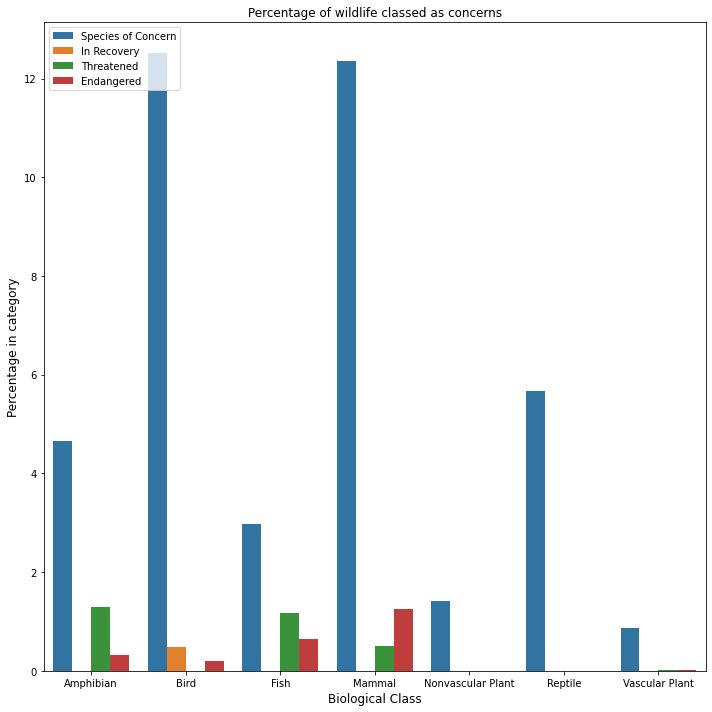

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = end_classes.category, y = end_classes.perc_obs, hue=end_classes.conservation_status, hue_order = order_mean.conservation_status.iloc[1:])
ax.set_xlabel("Biological Class", fontsize = "large")
ax.set_ylabel("Percentage in category", fontsize = "large")
plt.title("Percentage of wildlife classed as concerns", fontsize = "large")
plt.tight_layout()
plt.legend()
plt.show()

From this plot, we can make a few deductions:
- Vascular plants, nonvascular plants, and reptiles are generally very safe from concern ('Least Concern' category has been removed, so small bars means high percentage of these classes are in this category).
- A higher proportion of mammals are endangered, along with fish. Some amphibians and birds are also endangered
- The vast majority of species in recovery are birds.
- The majority of species are in no danger whatsoever.